## Exploring the numpy.random package

Randomly generated data is important in [various kinds of statistical research as well as aspects of computer science such as simulation and cryptography](https://en.wikipedia.org/wiki/Random_number_generation) and other areas where unpredictable results are necessary, for example, lottery-gaming, draws and slot machines. In the case of statistical research, such as surveys that are based on a representative sample of a population (where it would not be feasible to survey an entire nation, for example) a [probability sampling method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/) can be designed to ensure that each member of a specific population has a known and equal chance of being included in a random sample.  Random sampling provides an unbiased interpretation of results. Random sampling is an essential element of computer science in general - for example, according to Dr Mads Haahr of www.random.org ["generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets"](https://www.random.org/randomness/). According to Jason Brownlee in his [Machine Learning Mastery blog](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) "the use of randomness is an important part of the configuration and evaluation of machine learning algorithms. From the random initialization of weights in an artificial neural network, to the splitting of data into random train and test sets, to the random shuffling of a training dataset in stochastic gradient descent, generating random numbers and harnessing randomness is a required skill".  

![numpy.jpg](numpy.jpg)
[NumPy](http://www.numpy.org/) (which stands for Numerical Python) is a library for the Python programming language, that adds support for huge multi-dimensional arrays and matrices of numbers. It also provides a large collection of high-level mathematical functions to operate on these arrays, and executes much faster than standard Python for this. It is an open source project and free to import, generally labelled in Python code as "np". It is part of the [SciPy](https://scipy.org/) ecosystem for Python, which also includes such libraries as pandas and matplotlib.


## numpy.random
[numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) is a submodule of the NumPy package that is used to generate random (or indeed, pseudorandom) numbers, using  an algorithm called the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a pseudorandom number generator (PRNG).  This means that numpy.random can provide numbers that appear to be unpredictable and undetermined, but it actually does not generate numbers that are random in the *truest* sense of the term; rather it's sequence is based on random seed generation, which I'll discuss later in this assignment.  Python itself also utilises this PRNG in it's own [random](https://docs.python.org/3/library/random.html) module but numpy.random allows for randomly generated [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html), which means more powerful randomly generated data structures can be derived in a more efficient way using numpy.random. It also provides "convenience functions" which are essentially wrappers that the user can select for generation of floats, integers or with a specific distribution (e.g the [randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn) function that returns a sample from the standard normal distribution. 

## Random sampling (numpy.random)

### Simple random data

There are 10 functions available in the Simple Random Data section of the numpy.random submodule.  As I read through the documentation for these, I noticed that most of them offer random data in particular distributions - either or uniform (discrete or continuous) or normal / "Gaussian" which demonstrate the probability of the occurence and frequency of each individual value.

### Uniform
The **rand** and **choice** functions generate random data from a uniform distribution.  This ["refers to a probability distribution for which all of the values that a random variable can take on occur with equal probability"](https://stattrek.com/statistics/dictionary.aspx?definition=uniform_distribution). When random data from these functions are plotted, they take the shape of a uniform spread across a graph with no distinct peaks:

![uniform-histogram.jpg](uniform-histogram.jpg)
https://www.mathbootcamps.com/common-shapes-of-distributions/ 

I decided to try this out for myself - 

([array([1., 0., 1., 0., 0., 0., 0., 1., 1., 0.]),
  array([0., 0., 1., 1., 0., 1., 0., 0., 1., 0.]),
  array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])],
 array([0.13618489, 0.21660389, 0.29702289, 0.3774419 , 0.4578609 ,
        0.5382799 , 0.61869891, 0.69911791, 0.77953691, 0.85995592,
        0.94037492]),
 <a list of 3 Lists of Patches objects>)

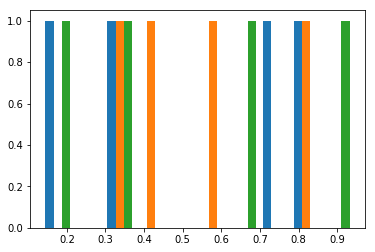

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(4,3)
plt.hist(x)

I can see from the above that an array of 4 rows and 3 columns has been created, all with randomly selected values that range from 0 to 0.99999999.  

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

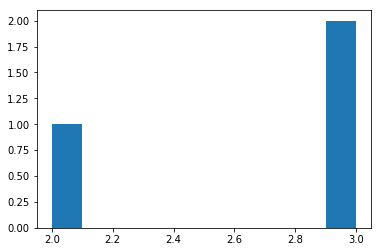

In [6]:
z = np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])
plt.hist(z)

Whether a distribution is discrete or continuous uniform depends on what value the variable can take.  [If a variable can take on any value between two specified values, it is called a continuous variable; otherwise, it is called a discrete variable](https://stattrek.com/probability-distributions/discrete-continuous.aspx)



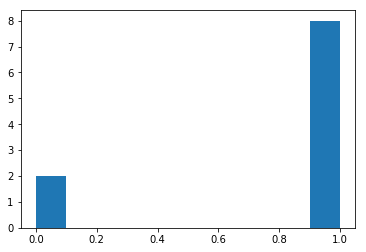

In [7]:
x = np.random.randint(2, size=10)
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

The above histogram shows the amount of times an array of 10 integers indexed from 0 to 1 (i.e. count of 2) has been generated. As the distribution of these is discrete uniform, each integer has an equal probability of being chosen in the 10 picks. 

I noticed from the [Numpy documentation page on numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) that the next four functions (**random_sample**, **random**, **ranf**, and **sample** functions) all return random floats in the half open interval (again from 0.0 up to but not including 1.0) in the "continuous uniform" distribution.  

![random.jpg](random.jpg)

The random.sample function displays this as follows:

(array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1.]),
 array([0.01084343, 0.05897879, 0.10711415, 0.1552495 , 0.20338486,
        0.25152022, 0.29965557, 0.34779093, 0.39592628, 0.44406164,
        0.492197  ]),
 <a list of 10 Patch objects>)

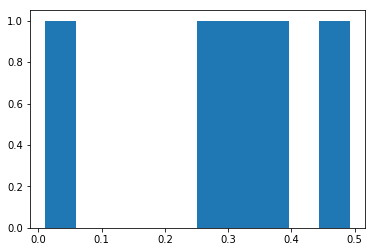

In [11]:
y = np.random.random_sample((5,))
plt.hist(y)

### Normal or "Gaussian" distribution
Following from this is the **randn()** function, that [generates an array filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn), which involved quite a bit of Gooling to try to understand! [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution) confirms that the Gaussian distribution is also know as "normal" distribution and "the bell curve".  I read [a post on stackoverflow.com](https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution) that suggested using [Seaborn](https://seaborn.pydata.org/) for plotting a graph that displays this so I tried it out.

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


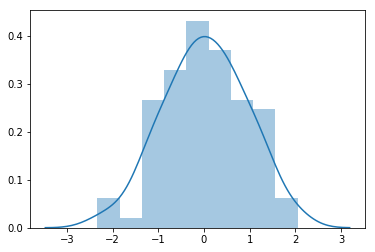

In [25]:
import seaborn as sns
value = np.random.randn(100)
sns.distplot(value)

This graph displays a bell-shaped curve, centered at zero, which is typical of the normal distribution, as [the shape of the normal distribution is completely described by the mean and the standard deviation](https://stattrek.com/online-calculator/normal.aspx). 

<function matplotlib.pyplot.show(*args, **kw)>

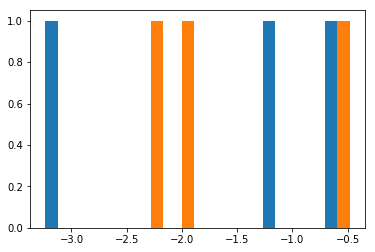

In [36]:
%matplotlib inline 
y = 5 * np.random.random_sample((3, 2)) - 5
plt.hist(y)
plt.show

## Permutations
The Permutations functions of numpy.random are [shuffle(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html) and [permutation(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation).  

Both of these functions relate to re-arranging provided random data. The shuffle(x) function shuffles data on the first axis of a multi-dimensional array, where the order of sub-arrays is changed but the contents remain the same:


https://en.wikipedia.org/wiki/Stochastic_gradient_descent

### Multi Dimensional Array

In [7]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(M)
M

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the numbers inside the brackets have remained in the same order they were originally written in.

### 1 Dimensional Array
With an array that is 1 Dimensional, the shuffle(x) function 

In [8]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([4,8,15,16,23,42])
np.random.shuffle(M)
M

array([15, 42,  4, 23, 16,  8])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the contents inside the brackets have remained in the same order.

The permutation(x) function however, when given an array, takes a copy and shuffles the elements randomly. 

In [9]:
#example using an array from https://www.w3cschool.cn/doc_numpy_1_10/numpy_1_10-generated-numpy-random-permutation.html
import numpy as np
array = np.random.permutation([1, 4, 9, 12, 15])
array

array([ 1,  9,  4, 12, 15])

In the case of an integer, the permutation function randomly permutes it's range:

In [10]:
#example using an integer 
import numpy as np
integer = np.random.permutation(8)
integer

array([0, 4, 5, 6, 1, 2, 3, 7])

The reasons for shuffling or permuting data it seems is to 
"It is good practice to randomly shuffle the training data before each training iteration. Even if your algorithm is not susceptible"https://machinelearningmastery.com/randomness-in-machine-learning/

## Distributions
From a practical perspective, we can think of a distribution as a function that describes the relationship between observations in a sample space. (https://machinelearningmastery.com/statistical-data-distributions/) 

## Random Seed

In programming, randomly generated numbers can be used to test and debug code, but it is important to have consistency in the tests, so for this reason, fixing the seed of the random module can help. (http://hplgit.github.io/scipro-primer/slides/random/html/random-reveal.html) https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array
http://wwwcp.tphys.uni-heidelberg.de/Polymer/day2/random_numbers/p2.htm 
https://www.random.org/randomness/
https://www.ibm.com/developerworks/library/s-playing/ 

## References
1. [NumPy](http://www.numpy.org/)
2. [SciPy](https://scipy.org/)
3. [Random Number Generation](https://en.wikipedia.org/wiki/Random_number_generation)
4. [Probability Sampling Method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/)
5. [How to Generate Random Numbers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) 
6. [Numpy.random User Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
7. [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister)
8. [Python random module](https://docs.python.org/3/library/random.html)
9. [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html)
10.
